In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [2]:
#ucitavanje podataka
x_train, y_train = load_data()

In [3]:
#populacija grada u 10000 ljudi
print("Prvih 5 vrijednosti podataka za trening:\n", x_train[:5]) 
#vrijednost 6.1101 predstavlja grad s populacijom 61101 ljudi

Prvih 5 vrijednosti podataka za trening:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [4]:
#mjesecni profit restorana u 10000$
print("Prvih 5 vrijednosti podataka koje predvidamo:\n", y_train[:5])
#vrijednost 17.592 predstavlja mjesecni profit restorana u iznosu 175920$  

Prvih 5 vrijednosti podataka koje predvidamo:
 [17.592   9.1302 13.662  11.854   6.8233]


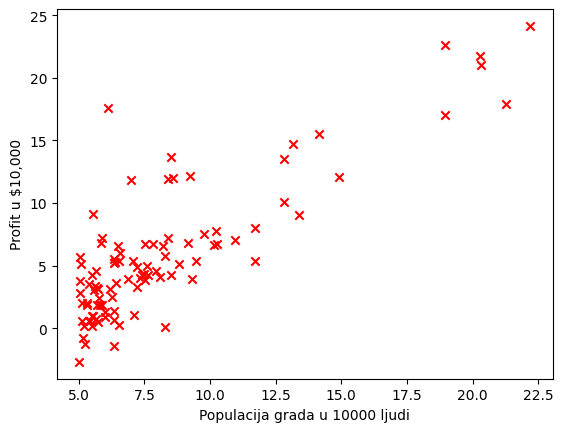

In [5]:
#vizualizacija podataka
plt.scatter(x_train, y_train, marker='x', c='r') 

plt.ylabel('Profit u $10,000')
plt.xlabel('Populacija grada u 10000 ljudi')
plt.show()

In [6]:
def compute_cost(x, y, w, b): 
    """
    Izracunava cost function za linear regression (squared error function).
    
    Argumenti:
        x (ndarray): Shape (m,) Podaci prema kojima treniramo model (Populacija grada) 
        y (ndarray): Shape (m,) podaci koje predvidamo (Profit restorana)
        w, b (scalar): Parametri modela
    
    Povratna vrijednost
        total_cost (float): Cijena kad koristimo parametre w i b za predvidanje y pomocu x
    """
    m = x.shape[0] 
    
    total_cost = 0
    
    for i in range(m):
        total_cost += (w * x[i] + b - y[i])**2

    return total_cost / (2 * m)

In [7]:
def compute_gradient(x, y, w, b): 
    """
    Izracunava gradijent
    Argumenti:
        x (ndarray): Shape (m,) Podaci prema kojima treniramo model (Populacija grada) 
        y (ndarray): Shape (m,) podaci koje predvidamo (Profit restorana)
        w, b (scalar): Parametri modela
    
    Povratna vrijednost
      dj_dw (scalar): Gradijent pomocu kojega cemo podesavati w
      dj_db (scalar): Gradijent pomocu kojega cemo podesavati b
     """
    
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        dj_dw += (w * x[i] + b - y[i]) * x[i]
        dj_db += w * x[i] + b - y[i]
    dj_dw /= m
    dj_db /= m
        
    return dj_dw, dj_db

In [10]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Izvodi batch gradient da nauci parametre w i b. 
   
    """
    
    m = len(x)
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w, b )  

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<100000:      
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteracija {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history 

In [11]:
initial_w = 0.
initial_b = 0.

iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w i b nakon gradient descenta:", w, b)

Iteracija    0: Cost     6.74   
Iteracija  150: Cost     5.31   
Iteracija  300: Cost     4.96   
Iteracija  450: Cost     4.76   
Iteracija  600: Cost     4.64   
Iteracija  750: Cost     4.57   
Iteracija  900: Cost     4.53   
Iteracija 1050: Cost     4.51   
Iteracija 1200: Cost     4.50   
Iteracija 1350: Cost     4.49   
w i b nakon gradient descenta: 1.166362350335582 -3.63029143940436


We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [12]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

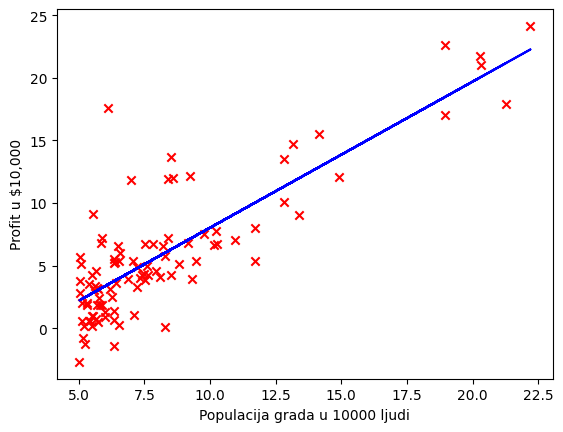

In [18]:
plt.plot(x_train, predicted, c = "b")

plt.scatter(x_train, y_train, marker='x', c='r') 

plt.ylabel('Profit u $10,000')
plt.xlabel('Populacija grada u 10000 ljudi')
plt.show()